# Fitting a Straight Line Using the Normal Equations

> Reference: OpenCV

## Base configurations

In [32]:
# Base Code

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random

In [33]:
# Plt style setup

plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["axes.titlesize"] = 18
plt.rcParams["axes.labelsize"] = 16
block_plot = False

---

In [34]:
## Generate Linear Data with Small Noise

In [35]:
def create_linear_data(num_data=100, y_offset=0, slope=1, stddev=0.3):
    X = 10 * torch.rand(size=[num_data])
    y = y_offset + slope * X + torch.normal(std=stddev, mean=0, size=[num_data])
    # y = ax + b + noise. offset = b, slope = a
    # Generate num_data samples from a normal distribution with a mean of 0 and standard deviation of stddev.

    X = X.view((len(X), 1))
    y = y.view((len(X), 1))

    return X, y


In [36]:
def plot_data(x, y, xlim=(0,10), ylim=(0,10)):
    plt.figure()
    plt.plot(x, y, "b.")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show(block=block_plot)

## Generate Linear Data

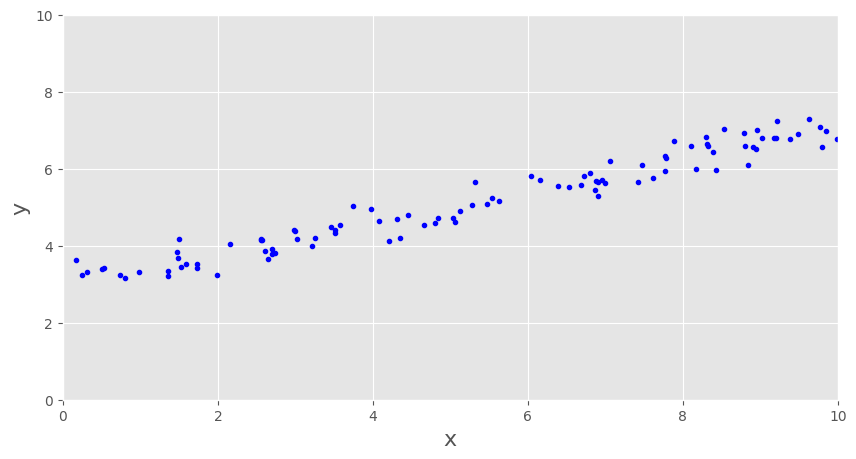

In [37]:
y_int = 3
slope = .4
X, y = create_linear_data(y_offset=y_int, slope= slope, stddev=0.3)

plot_data(X, y)

## Implement Normal Equation

In [38]:
def compute_theta(X, y):
    m = X.shape[0] # Number of samples

    # Concatenate a 1 to the beginning of each feature vector
    X = torch.cat((torch.ones((m, 1)), X), axis=1)
    y = y.view((m,1))

    X_T = X.T
    XT_X = torch.matmul(X_T, X)
    XT_X_inv = torch.inverse(XT_X)
    XT_y = torch.matmul(X_T, y)
    theta = torch.matmul(XT_X_inv, XT_y)

    return theta

## Solve for the Model Parameters (Slope and y-intercept)

In [39]:
print("Actual Coefficients:\n")
print("Slope: ", slope)
print("Y-Int: ", y_int)
print("\n")

theta = compute_theta(X, y)

y_int = theta[0].numpy()
slope = theta[1].numpy()

print("Predicted Coefficients:\n")
print("Slope: ", slope[0])
print("Y-Int: ", y_int[0])

Actual Coefficients:

Slope:  0.4
Y-Int:  3


Predicted Coefficients:

Slope:  0.41215634
Y-Int:  2.9484234


## Display the Result

In [40]:
def predict_y(X, theta):
    X = torch.cat((torch.ones((X.shape[0],1)), X), axis=1)
    pred_y = torch.matmul(X, theta)

    return pred_y


Text(0, 0.5, 'y')

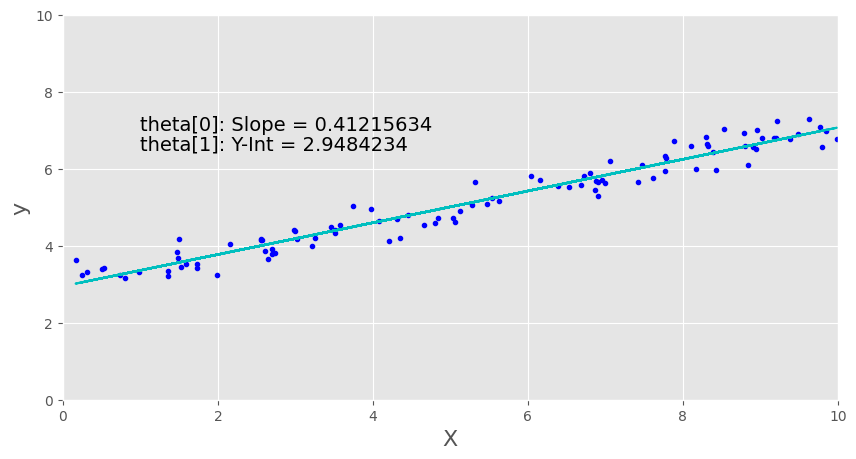

In [41]:
pred_y = predict_y(X, theta)
plt.plot(X, y, "b.")
plt.plot(X, pred_y, "c-")
plt.xlim((0, 10))
plt.ylim((0, 10))
plt.text(1, 7.0, "theta[0]: Slope = " + str(slope[0]), fontsize=14)
plt.text(1, 6.5, "theta[1]: Y-Int = " + str(y_int[0]), fontsize=14)
plt.xlabel("X")
plt.ylabel("y")

# Fitting a Straight Line using PyTorch

## Create the Pytorch model

In [42]:
model = nn.Linear(in_features=1, out_features=1, bias=False)

# nn.Linear: y=Wx+b.

## Compile the Model

In [43]:
optimizer = optim.Adam(model.parameters())
criterion = torch.nn.MSELoss()

In [44]:
## Train the Model

In [45]:
loss_curve = [] # saving for loss values

for epoch in range(5000):
    optimizer.zero_grad()
    # we reset the gradiant value to 0 from previous backpropagation at the start of each epoch
    # Basically, Pytorch keeps the slope parameter in memory.
    # So if you don't reset them, the parameter can lead the optimization in the wrong direction.
    output = model(X.float())
    loss = criterion(output, y.float())
    loss.backward() # backpropagation
    optimizer.step()
    loss_curve.append(loss.detach().numpy().item())
    # .detach(): Detaches the tensor from the computation graph, so it will not be included in gradient calculation
    # .numpy(): convert tensor to numpy array
    # .item(): convert a zero-dimensional tensor to a standard python number

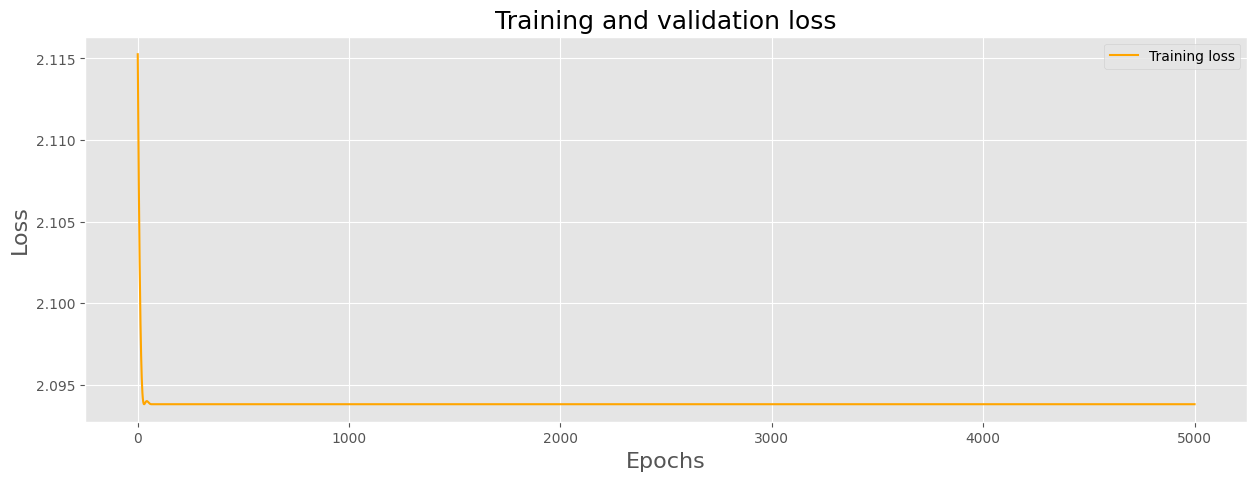

In [46]:
loss_values = loss_curve
epoch = range(1, len(loss_values) +1 )

plt.figure(figsize=[15,5])
plt.plot(epoch, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Predict Model parameters and Display Result

In [47]:
slope = model.state_dict()["weight"][0]
print('Slope: ', slope[0].numpy())

pred_y = model(X.float()).detach().numpy()

Slope:  0.8390905


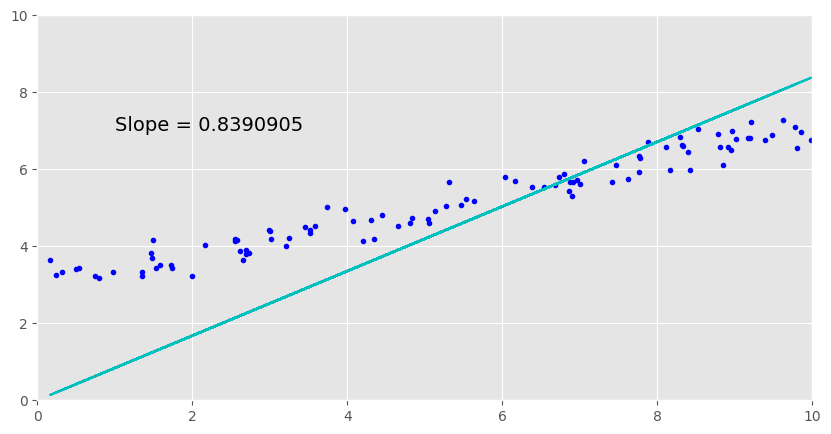

In [48]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize = 14)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

## Create the PyTorch Model with a Bias Term

In [49]:
model = nn.Linear(in_features=1, out_features=1, bias=True)

## Compile the Model

In [50]:
optimizer = optim.Adam(model.parameters())
criterion = torch.nn.MSELoss()

In [51]:
## Train the Model

In [52]:
loss_curve = []
for epoch in range(10000):
    optimizer.zero_grad()
    output = model(X.float())
    loss = criterion(output, y.float())
    loss.backward()
    optimizer.step()
    loss_curve.append(loss.detach().numpy().item())

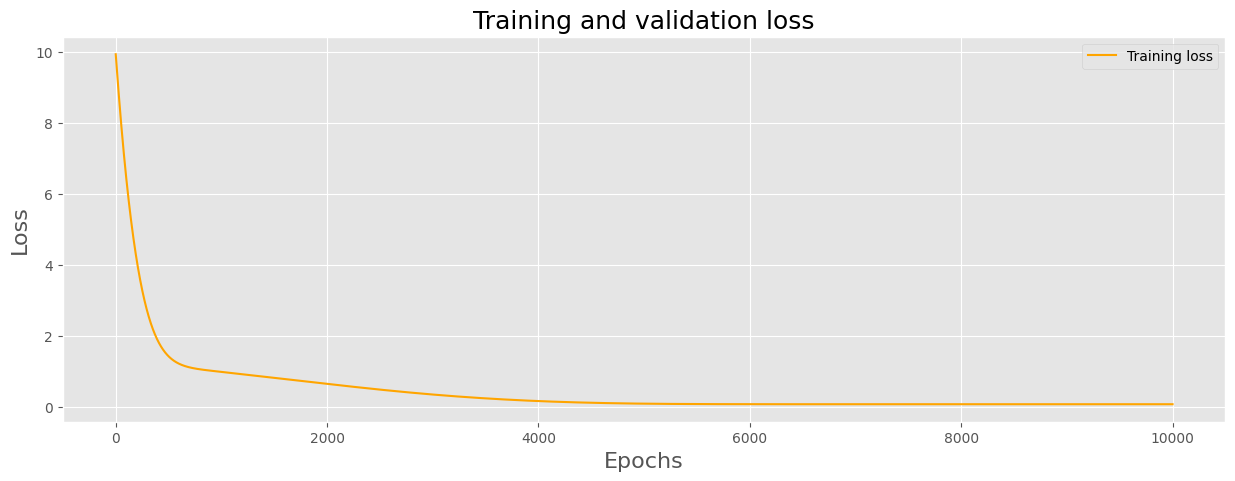

In [53]:
loss_values = loss_curve
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize = [15, 5])
plt.plot(epochs, loss_values, "orange", label = "Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Predict Model Parameters and Display Result

In [54]:
slope = model.state_dict()['weight'][0]
y_int = model.state_dict()['bias'][0]
print('Slope: ', slope[0].numpy())
print('Y-Int: ', y_int.numpy())

pred_y = model(X.float()).detach().numpy()

Slope:  0.41215703
Y-Int:  2.9484153


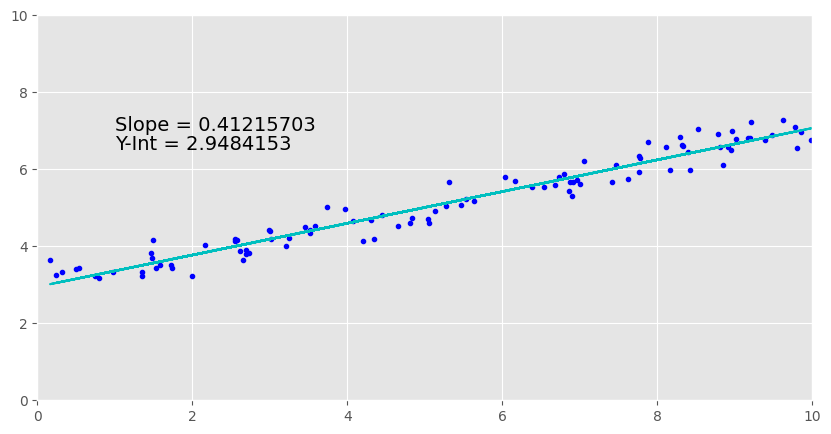

In [55]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize = 14)
plt.text(1, 6.5, 'Y-Int = ' + str(y_int.numpy()),    fontsize = 14)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()